<a href="https://colab.research.google.com/github/AAMNAWAHEED/Deep-Learning/blob/main/fashion_mnist_PIAIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.11.0


In [47]:
#data load
from tensorflow.keras.datasets import fashion_mnist
(train_image,train_label),(test_image,test_label)=fashion_mnist.load_data()

In [29]:
train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

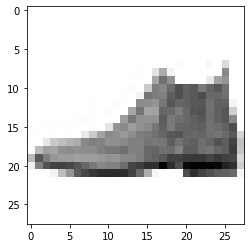

In [30]:
digit=test_image[0]
import matplotlib.pyplot as plt
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

In [31]:
train_image.shape

(60000, 28, 28)

In [32]:
test_image.shape

(10000, 28, 28)

In [33]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [48]:
network=tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(10,activation='softmax')])

**compilation**

In [49]:
network.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

**preparing imag data**

In [50]:
train_image=train_image.reshape((60000,28*28))
train_image=train_image.astype('float32')/255
test_image=test_image.reshape((10000,28*28))
test_image=test_image.astype('float32')/255

In [51]:
network.fit(train_image,train_label,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.5046 - accuracy: 0.8234
Epoch 2/5
469/469 [==============================] - 6s 13ms/step - loss: 0.3723 - accuracy: 0.8666
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.3309 - accuracy: 0.8798
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.3044 - accuracy: 0.8879
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.2841 - accuracy: 0.8955


In [52]:
test_loss,test_acc=network.evaluate(test_image,test_label)
print(test_acc,test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 0.3448 - accuracy: 0.8766
0.8766000270843506 0.3447745442390442


In [53]:
res=network.predict(test_image)[0]
res

313/313 [==============================] - 1s 3ms/step


array([1.1569487e-05, 7.4306158e-08, 3.7355646e-06, 8.1051400e-07,
       1.8515566e-05, 5.9267145e-02, 1.6268761e-05, 1.9574201e-02,
       5.4822201e-05, 9.2105287e-01], dtype=float32)